In [ ]:
#Exploring & Cleaning 

In [1]:
#Importing Libraries 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Importing Data
df=pd.read_excel('payroll_tasks.xlsx') 

In [3]:
#Overview of Data 
df.head()

,TEAM,DATE TASK CREATED,DATE TASK COMPLETED,PRIORITY,PROCESS,STAGE
0,PAYROLL TASK,2021-03-16,2021-03-22,4.0,CREATE RECORD,1: CREATE RECORD
1,PAYROLL TASK,2021-03-19,2021-03-22,4.0,CREATE RECORD,2: AUTHORISATION
2,PAYROLL TASK,2021-03-18,2021-03-22,4.0,CREATE RECORD,2: AUTHORISATION
3,PAYROLL TASK,2021-03-22,2021-03-22,4.0,CREATE RECORD,2: AUTHORISATION
4,PAYROLL TASK,2021-03-22,2021-03-22,4.0,CREATE RECORD,2: AUTHORISATION


In [4]:
#View number of records and columns 
df.shape 

(1945, 6)

In [5]:
#Delete unneccessary columns 
df=df.drop(['TEAM ', 'PRIORITY ' ], axis=1) 

In [6]:
#Finding null values 
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

DATE TASK CREATED       104
DATE TASK COMPLETED      35
PROCESS                   4
STAGE                     1
dtype: int64

In [7]:
#What is the percentage of values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

DATE TASK CREATED       5.347044
DATE TASK COMPLETED     1.799486
PROCESS                 0.205656
STAGE                   0.051414
dtype: float64


In [8]:
#Putting all records with Date Created as null values together
Null_Values1=df[df['DATE TASK CREATED '].isna() ]

In [9]:
#Viewing process distribution    
Null_Values1['PROCESS '].value_counts()

CREATE RECORD               58
CHANGE BANK DETAILS         27
CHANGE ADDRESS              16
END PENSION UPON DEATH       3
Name: PROCESS , dtype: int64

In [10]:
#Viewing Date Task Completion distribution 
Null_Values1['DATE TASK COMPLETED '].value_counts()

2021-03-23    32
2021-03-22    31
2021-03-24    13
2021-03-25     6
2021-03-26     6
Name: DATE TASK COMPLETED , dtype: int64

In [11]:
Null_Values2=df[df['DATE TASK COMPLETED '].isna() ]

In [12]:
Null_Values2['PROCESS '].value_counts()

END PENSION UPON DEATH      19
CHANGE ADDRESS              16
Name: PROCESS , dtype: int64

In [13]:
Null_Values2['DATE TASK CREATED '].value_counts() 

2021-02-07    4
2021-02-04    3
2021-02-01    3
2021-02-12    2
2021-02-11    2
2021-01-30    1
2021-02-05    1
2021-02-03    1
2021-02-02    1
2021-02-08    1
Name: DATE TASK CREATED , dtype: int64

In [14]:
#Using knowledge of time taken to complete processes input value for DATE TASK CREATED  
df['DATE TASK CREATED '].fillna('2021-03-22', inplace = True)

In [15]:
#Using knowledge of time taken to complete processes input value for DATE TASK CREATED 
df['DATE TASK COMPLETED '].fillna('2021-03-28', inplace = True)

In [16]:
#Checking Null values again 
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

PROCESS     4
STAGE       1
dtype: int64

In [17]:
#Dropping values 
df = df.dropna(how='any',axis=0)

In [18]:
#Checking again 
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [19]:
#Exploring unique processes 
df['PROCESS '].unique()

array(['CREATE RECORD  ', 'APPLYING ANNUAL PENSION INCREASE AT 55',
       'TAX ENQUIRY', 'END WIDOW / WIDOWER PENSION AFTER REMARRIAGE',
       'PAYROLL MISC ENQUIRY', 'ENQUIRY ON END OF PENSION UPON DEATH ',
       'CHANGE BANK DETAILS ', 'AWARDS MISC TASK ',
       'NOTIFICATION OF CHANGE BY NFI', 'REEMPLOYMENT OF MEMBER ',
       'DEPENDENTS PENSION ENQUIRY', 'CHANGE OVERSEAS BANK DETAILS ',
       'CHANGE OVERSEAS BANK DETAILS  ', 'CHANGE ADDRESS',
       'END PENSION UPON DEATH  ', 'END PENSION UPON DEATH '],
      dtype=object)

In [20]:
#Merging End Pension Upon Death:are the same but seperated by python because of spacing 
df=df.replace(['END PENSION UPON DEATH  ','END PENSION UPON DEATH '],'END')

In [21]:
#The same for Change Overseas Bank Details
df=df.replace(['CHANGE OVERSEAS BANK DETAILS  ','CHANGE OVERSEAS BANK DETAILS '],'OVERSEAS')

In [22]:
#Deleting Non Payroll task 
Delete_Awards = df[ df['PROCESS '] =='AWARDS MISC TASK ' ].index
df.drop(Delete_Awards, inplace = True)

In [23]:
#Checking Unique Values again
df['PROCESS '].unique()

array(['CREATE RECORD  ', 'APPLYING ANNUAL PENSION INCREASE AT 55',
       'TAX ENQUIRY', 'END WIDOW / WIDOWER PENSION AFTER REMARRIAGE',
       'PAYROLL MISC ENQUIRY', 'ENQUIRY ON END OF PENSION UPON DEATH ',
       'CHANGE BANK DETAILS ', 'NOTIFICATION OF CHANGE BY NFI',
       'REEMPLOYMENT OF MEMBER ', 'DEPENDENTS PENSION ENQUIRY',
       'OVERSEAS', 'CHANGE ADDRESS', 'END'], dtype=object)

In [24]:
#Exploring distribution of processes 
df['PROCESS '].value_counts()

END                                             1428
CREATE RECORD                                    309
PAYROLL MISC ENQUIRY                              49
TAX ENQUIRY                                       40
CHANGE BANK DETAILS                               40
CHANGE ADDRESS                                    27
DEPENDENTS PENSION ENQUIRY                        14
APPLYING ANNUAL PENSION INCREASE AT 55            12
ENQUIRY ON END OF PENSION UPON DEATH               7
OVERSEAS                                           7
END WIDOW / WIDOWER PENSION AFTER REMARRIAGE       3
REEMPLOYMENT OF MEMBER                             2
NOTIFICATION OF CHANGE BY NFI                      1
Name: PROCESS , dtype: int64

In [25]:
#Exploring number of  stages in each process
Process= df.groupby(['PROCESS '])
Process['STAGE '].nunique() 

PROCESS 
APPLYING ANNUAL PENSION INCREASE AT 55          1
CHANGE ADDRESS                                  1
CHANGE BANK DETAILS                             2
CREATE RECORD                                   7
DEPENDENTS PENSION ENQUIRY                      1
END                                             5
END WIDOW / WIDOWER PENSION AFTER REMARRIAGE    3
ENQUIRY ON END OF PENSION UPON DEATH            1
NOTIFICATION OF CHANGE BY NFI                   1
OVERSEAS                                        1
PAYROLL MISC ENQUIRY                            1
REEMPLOYMENT OF MEMBER                          1
TAX ENQUIRY                                     1
Name: STAGE , dtype: int64

In [26]:
#In preparation for creating pie chart put all tasks with small numbers together 
df=df.replace(['PAYROLL MISC ENQUIRY','TAX ENQUIRY', 'CHANGE BANK DETAILS ','CHANGE ADDRESS',
'DEPENDENTS PENSION ENQUIRY','APPLYING ANNUAL PENSION INCREASE AT 55', 'ENQUIRY ON END OF PENSION UPON DEATH ','OVERSEAS',
'END WIDOW / WIDOWER PENSION AFTER REMARRIAGE','REEMPLOYMENT OF MEMBER ','NOTIFICATION OF CHANGE BY NFI'],'OTHER')

In [27]:
#Checking 
df['PROCESS '].value_counts()

END                1428
CREATE RECORD       309
OTHER               202
Name: PROCESS , dtype: int64

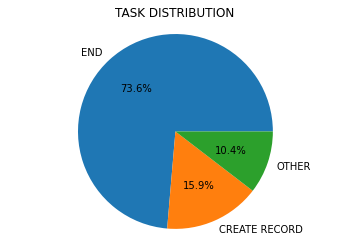

In [28]:
#Pie Chart to clearly show the distribution 
percentage=df['PROCESS '].value_counts(normalize=True)
my_labels = 'END','CREATE RECORD ','OTHER'
plt.pie(percentage,labels=my_labels,autopct='%1.1f%%')
plt.labels=my_labels
plt.title('TASK DISTRIBUTION')
plt.axis('equal')
plt.show() 


In [29]:
#END has by far the most but CREATE RECORD was worth exploring as 7 stages is unexpected.
#Along with result also take into account 58 records originally had a null value. 
Process['STAGE '].value_counts().loc['CREATE RECORD  ']

STAGE 
1: CREATE RECORD      163
2: AUTHORISATION       67
1: CREATE RECORD       37
2: CREATE RECORD       25
2: AUTHORISATION       15
1 CREATE RECORD         1
11: CREATE RECORD       1
Name: STAGE , dtype: int64

In [30]:
#Exploring END .Has 5 stages.
Process['STAGE '].value_counts().loc['END']

STAGE 
2: DOCUMENTS RECEIVED     521
5: NOTIFY EXECUTOR        310
4: CHECK CALCULATION      281
1: NOTIFICATION           172
3: CALCULATION            144
Name: STAGE , dtype: int64

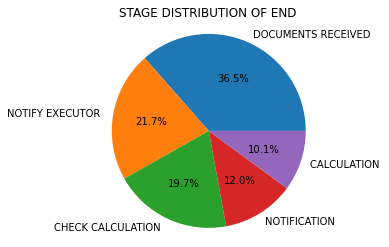

In [31]:
#Will focus on these tasks going forward 
End_Stages=Process['STAGE '].value_counts().loc['END']
End_labels = 'DOCUMENTS RECEIVED ','NOTIFY EXECUTOR ','CHECK CALCULATION ','NOTIFICATION ','CALCULATION '
plt.pie(End_Stages,labels=End_labels,autopct='%1.1f%%')
plt.labels=End_labels
plt.title('STAGE DISTRIBUTION OF END')
plt.axis('equal')
plt.show() 

In [32]:
#Saving to flie for next stage 
EP=df.loc[df['PROCESS '] == 'END']
EP.to_excel('End.xlsx',index=False) 

In [ ]:
#Feature Egineering 

In [33]:
#Importing Libraries 
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#Importing file 
df=pd.read_excel('End.xlsx')

In [35]:
#View number of records and columns 
df.shape 

(1428, 4)

In [36]:
#Overview
df.head() 

,DATE TASK CREATED,DATE TASK COMPLETED,PROCESS,STAGE
0,2021-03-21,2021-03-22,END,1: NOTIFICATION
1,2021-03-22,2021-03-22,END,1: NOTIFICATION
2,2021-03-22,2021-03-22,END,1: NOTIFICATION
3,2021-03-22,2021-03-23,END,1: NOTIFICATION
4,2021-03-22,2021-03-23,END,1: NOTIFICATION


In [37]:
#Creating column with just number from STAGE 
df['STAGE NO'] = (df['STAGE '].str.split(':').str[0]) 

In [38]:
#Checking 
df.head() 

,DATE TASK CREATED,DATE TASK COMPLETED,PROCESS,STAGE,STAGE NO
0,2021-03-21,2021-03-22,END,1: NOTIFICATION,1
1,2021-03-22,2021-03-22,END,1: NOTIFICATION,1
2,2021-03-22,2021-03-22,END,1: NOTIFICATION,1
3,2021-03-22,2021-03-23,END,1: NOTIFICATION,1
4,2021-03-22,2021-03-23,END,1: NOTIFICATION,1


In [39]:
#Big distribution of DATE TASK COMPLETED 
df['DATE TASK CREATED '].value_counts()

2021-03-21    97
2021-02-04    52
2021-03-22    50
2021-01-29    45
2021-03-23    43
2021-02-12    41
2021-03-24    41
2021-01-28    41
2021-01-31    39
2021-02-02    39
2021-01-30    39
2021-03-16    39
2021-02-07    37
2021-02-10    36
2021-02-14    35
2021-02-03    35
2021-03-10    35
2021-03-13    34
2021-02-08    33
2021-02-06    33
2021-02-05    32
2021-03-15    31
2021-03-08    31
2021-03-07    30
2021-03-06    30
2021-02-11    30
2021-03-19    29
2021-02-09    28
2021-02-01    28
2021-03-11    27
2021-03-18    27
2021-03-09    26
2021-02-19    24
2021-02-17    24
2021-03-20    23
2021-02-15    21
2021-02-18    21
2021-03-05    20
2021-03-14    20
2021-03-17    19
2021-03-12    19
2021-02-16    17
2021-03-25    15
2021-03-26     8
2021-03-27     4
Name: DATE TASK CREATED , dtype: int64

In [40]:
#Compared to TASK COMPLETED 
df['DATE TASK COMPLETED '].value_counts()

2021-03-24    352
2021-03-25    288
2021-03-27    182
2021-03-22    180
2021-03-26    147
2021-03-23    140
2021-03-28    139
Name: DATE TASK COMPLETED , dtype: int64

In [41]:
#Checking dates in datetime mode for calculation 
print (df.dtypes)

DATE TASK CREATED       datetime64[ns]
DATE TASK COMPLETED     datetime64[ns]
PROCESS                         object
STAGE                           object
STAGE NO                        object
dtype: object


In [42]:
#Creating the date column 
df['DAYS'] = (df['DATE TASK COMPLETED '] - df['DATE TASK CREATED ']).dt.days

In [43]:
#Checking 
df.head() 

,DATE TASK CREATED,DATE TASK COMPLETED,PROCESS,STAGE,STAGE NO,DAYS
0,2021-03-21,2021-03-22,END,1: NOTIFICATION,1,1
1,2021-03-22,2021-03-22,END,1: NOTIFICATION,1,0
2,2021-03-22,2021-03-22,END,1: NOTIFICATION,1,0
3,2021-03-22,2021-03-23,END,1: NOTIFICATION,1,1
4,2021-03-22,2021-03-23,END,1: NOTIFICATION,1,1


In [44]:
#Dropping now unneccessary columns from dataframe   
df.drop(['DATE TASK CREATED ', 'DATE TASK COMPLETED ','PROCESS ','STAGE ' ], axis=1,inplace = True )

In [45]:
#New Dataframe 
df.head() 

,STAGE NO,DAYS
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1


In [46]:
#Days taken at each stage 
df.groupby('STAGE NO')['DAYS'].unique()

STAGE NO
1                                         [1, 0, 2, 3]
2    [1, 15, 12, 17, 6, 2, 14, 7, 3, 10, 9, 18, 5, ...
3    [0, 34, 31, 32, 33, 37, 39, 35, 40, 42, 38, 36...
4    [47, 50, 48, 45, 46, 55, 42, 0, 43, 41, 44, 1,...
5    [54, 45, 53, 57, 44, 55, 46, 43, 47, 40, 52, 4...
Name: DAYS, dtype: object

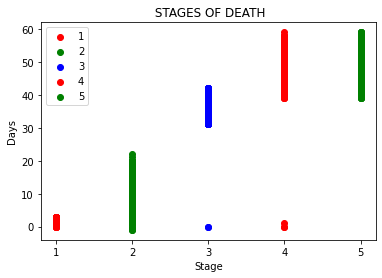

In [47]:
#Creating a scatter diagram showing the number of days til completion of each stage from notication of death 
Stage_1=df['STAGE NO']=='1'
Stage_2=df['STAGE NO']=='2'
Stage_3=df['STAGE NO']=='3'
Stage_4=df['STAGE NO']=='4'
Stage_5=df['STAGE NO']=='5'



fig, ax1 = plt.subplots()

ax1.scatter(df[Stage_1]['STAGE NO'], df[Stage_1]['DAYS'],color='r',label='1')
ax1.scatter(df[Stage_2]['STAGE NO'], df[Stage_2]['DAYS'],color='g',label='2')
ax1.scatter(df[Stage_3]['STAGE NO'], df[Stage_3]['DAYS'],color='b',label='3')
ax1.scatter(df[Stage_4]['STAGE NO'], df[Stage_4]['DAYS'],color='r',label='4')
ax1.scatter(df[Stage_5]['STAGE NO'], df[Stage_5]['DAYS'],color='g',label='5')
ax1.set_title(' STAGES OF DEATH')
ax1.set_xlabel('Stage')
ax1.set_ylabel('Days')
ax1.legend() 

Text(0.04, 0.5, 'Frequency')

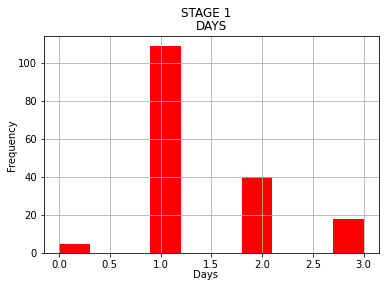

In [48]:
#Creating a histogram for each stage to see the distribution more clearly 
fig, axes1 = plt.subplots()
S1=df.loc[df['STAGE NO'] == '1']
S1.hist(color = "r",ax=axes1)  
plt.suptitle('STAGE 1')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

Text(0.04, 0.5, 'Frequency')

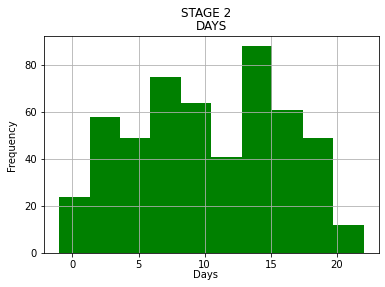

In [49]:
fig, axes2 = plt.subplots()
S2=df.loc[df['STAGE NO'] == '2']
S2.hist(color = "g",ax=axes2) 
plt.suptitle('STAGE 2')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')  

Text(0.04, 0.5, 'Frequency')

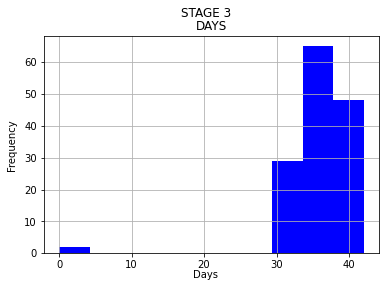

In [50]:
fig, axes3 = plt.subplots()
S3=df.loc[df['STAGE NO'] == '3']
S3.hist(color = "b",ax=axes3) 
plt.suptitle('STAGE 3')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

In [51]:
#Deleting Outliers 
Outliers_3 = df[ (df['DAYS'] <25) & (df['STAGE NO'] == '3')].index
df.drop(Outliers_3, inplace = True)

Text(0.04, 0.5, 'Frequency')

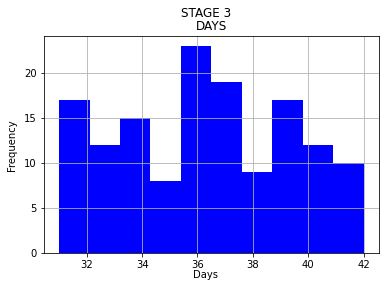

In [52]:
#Viewing again  
fig, axes3 = plt.subplots()
S3=df.loc[df['STAGE NO'] == '3']
S3.hist(color = "b",ax=axes3) 
plt.suptitle('STAGE 3')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

Text(0.04, 0.5, 'Frequency')

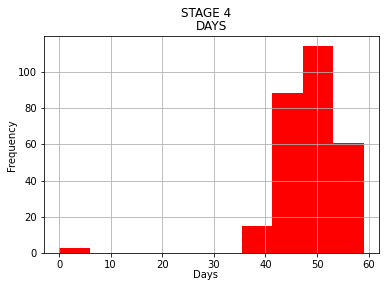

In [53]:
fig, axes4 = plt.subplots()
S4=df.loc[df['STAGE NO'] == '4']
S4.hist(color = "r",ax=axes4) 
plt.suptitle('STAGE 4')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

In [54]:
Outliers_4 = df[ (df['DAYS'] <25) & (df['STAGE NO'] == '4')].index
df.drop(Outliers_4, inplace = True)

Text(0.04, 0.5, 'Frequency')

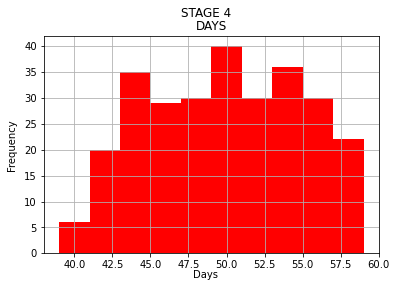

In [55]:
fig, axes4 = plt.subplots()
S4=df.loc[df['STAGE NO'] == '4']
S4.hist(color = "r",ax=axes4) 
plt.suptitle('STAGE 4')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

Text(0.04, 0.5, 'Frequency')

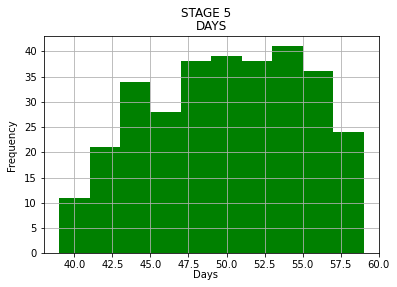

In [56]:
fig, axes5 = plt.subplots()
S5=df.loc[df['STAGE NO'] == '5']
S5.hist(color = "g",ax=axes5) 
plt.suptitle('STAGE 5')
fig.text(0.5, 0.04,'Days', ha='center')
fig.text(0.04, 0.5,'Frequency', va='center', rotation='vertical')

In [57]:
#Checking
print(df.dtypes) 

STAGE NO    object
DAYS         int64
dtype: object


In [58]:
 #Changing Stage No to numeric  
df['STAGE NO'] = pd.to_numeric(df['STAGE NO'])

In [59]:
#Saving Data to Excel for next stage 
df.to_excel('Data.xlsx',index=False) 

In [ ]:
#Lineawr Regression 

In [60]:
#Importing Libraries 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
#Importing file 
df=pd.read_excel('Data.xlsx')

In [62]:
#Overview
df.head() 

,STAGE NO,DAYS
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1


In [63]:
# Defining X
X = df[['STAGE NO']] 

# Definng Y
y = df[['DAYS']] 

In [64]:
# Spliting X and Y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [65]:
#Viewing Test 
X_test

,STAGE NO
1044,4
393,2
1338,5
1282,5
141,1
...,...
408,2
1302,5
528,2
302,2


In [66]:
#Creating Linear Regression Model 
lin_reg = LinearRegression()

In [67]:
# Fitting the linear regression model
lin_reg.fit(X_train, y_train)
# Predict the values given in test set
predictions = lin_reg.predict(X_test)

# Print the intercept and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_) 

[-13.60849036]
[[13.76071363]]


In [68]:
# Mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))  
 
# Mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))  
 
#Root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
 
#R2-square
print("R2-Square:",r2_score(y_test, predictions)) 

Mean Absolute Error(MAE): 5.708912405007524
Mean Squared Error(MSE): 52.2352615663753
Root Mean Squared Error(RMSE): 7.227396596726604
R2-Square: 0.8783925192376948


Text(0.5, 1.0, 'LINE OF BEST FIT')

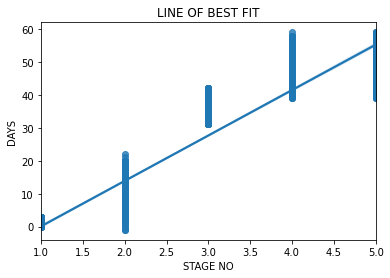

In [69]:
#Visualising the model 
ax = sns.regplot(x='STAGE NO', y='DAYS', data=df) 
ax.set_title("LINE OF BEST FIT")

In [70]:
#Using the model to predict number of days to complete each stage 
X_test1=[[1]]
predictions = lin_reg.predict(X_test1)
print(predictions)


[[0.15222327]]


In [71]:
X_test1=[[2]]
predictions = lin_reg.predict(X_test1)
print(predictions)


[[13.9129369]]


In [72]:
X_test1=[[3]]
predictions = lin_reg.predict(X_test1)
print(predictions)

[[27.67365054]]


In [73]:
X_test1=[[4]]
predictions = lin_reg.predict(X_test1)
print(predictions)

[[41.43436417]]


In [74]:
X_test1=[[5]]
predictions = lin_reg.predict(X_test1)
print(predictions)


[[55.1950778]]


In [ ]:
#End